In [8]:
from pandas import read_csv
from sklearn.model_selection import KFold
df=read_csv('iris.csv')
array=df.values
x=array[:,0:-1]
y=array[:,-1]
kfold=KFold(n_splits=10,shuffle=True,random_state=0)

In [50]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score

#model=BaggingClassifier(n_estimators=20,random_state=0)
#model=RandomForestClassifier(random_state=0,n_estimators=100,criterion="entropy")
model=ExtraTreesClassifier(n_estimators=100,random_state=0)
result=cross_val_score(model,x,y,cv=kfold,scoring='accuracy')
print("(accuracy={:.2f}%,sd={:.2f})".format(result.mean()*100,result.std()))

(accuracy=95.33%,sd=0.07)


In [51]:
model=model.fit(x,y)
y_perd=model.predict([[5.1,3.7,1.5,0.4]])
print(y_perd)

[0.]


In [52]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
y_pred =cross_val_predict(model,x,y,cv=kfold)
conf_mat=confusion_matrix(y,y_pred)
print('\n',conf_mat)
report=classification_report(y,y_pred)
print('\n',report)


 [[50  0  0]
 [ 0 46  4]
 [ 0  3 47]]

               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        50
         1.0       0.94      0.92      0.93        50
         2.0       0.92      0.94      0.93        50

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150



In [53]:
from sklearn import tree
import graphviz
import pydot

fn=['spl_len','spl_wid','ptl_len','ptl_wid']
cn=['0','1','2']
tree.export_graphviz(model.estimators_[99],
                    out_file="ensemble.dot",
                    feature_names=fn,
                    class_names=cn,
                    filled=True)
(graph,) = pydot.graph_from_dot_file('ensemble.dot')
#graph.write_png('BaggingClassifier.png')
#graph.write_png('RandomForestClassifier.png')
graph.write_png('ExtraTreesClassifier.png')

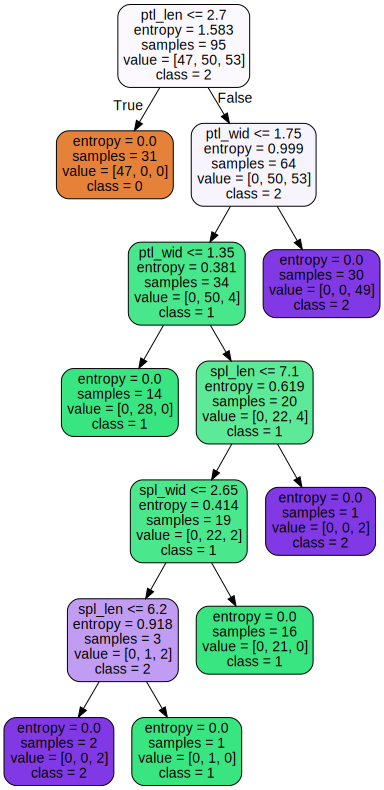

In [40]:
import graphviz
from sklearn.tree import export_graphviz
fn=['spl_len','spl_wid','ptl_len','ptl_wid']
cn=['0','1','2']
dot_data = export_graphviz(model.estimators_[99], 
                           feature_names=fn,
                            class_names=cn,
                           filled=True, impurity=True, 
                           rounded=True)

graph = graphviz.Source(dot_data, format='png')
graph